Source: https://www.google.com/covid19/mobility/

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('Region/2020_ID_Region_Mobility_Report.csv', parse_dates=['date'])
print('Shape: ', df.shape)
df.head()

Shape:  (13615, 15)


country_region_code country_region sub_region_1  sub_region_2  metro_area  \
0                  ID      Indonesia          NaN           NaN         NaN   
1                  ID      Indonesia          NaN           NaN         NaN   
2                  ID      Indonesia          NaN           NaN         NaN   
3                  ID      Indonesia          NaN           NaN         NaN   
4                  ID      Indonesia          NaN           NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id       date  \
0             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M 2020-02-15   
1             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M 2020-02-16   
2             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M 2020-02-17   
3             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M 2020-02-18   
4             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M 2020-02-19   

   retail_and_recreation_percent_change_from_baseline  \
0                                               -2.0    
1                                               -3.0    
2                                               -3.0    
3                                               -3.0    
4                                               -3.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                               -2.0   
1                                               -3.0   
2                                               -4.0   
3                                               -2.0   
4                                               -4.0   

   parks_percent_change_from_baseline  \
0                                -8.0   
1                                -7.0   
2                                -7.0   
3                                -4.0   
4                                -3.0   

   transit_stations_percent_change_from_baseline  \
0                                            1.0   
1                                           -4.0   
2                                           -1.0   
3                                            1.0   
4                                            0.0   

   workplaces_percent_change_from_baseline  \
0                                        5   
1                                        2   
2                                        3   
3                                        2   
4                                        1   

   residential_percent_change_from_baseline  
0                                         1  
1                                         2  
2                                         1  
3                                         1  
4                                         1

In [20]:
# drop useless columns
df.drop(columns=['sub_region_2', 'metro_area'], inplace=True)

In [21]:
df.sub_region_1.nunique()

34

In [22]:
location = [var for var in df.sub_region_1.unique()]
location.remove(np.nan)

In [23]:
# rename columns to make plot name better
df.columns = ['country_code', 'country_region', 'sub_region_1', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date', 'Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']

In [24]:
# parsing datetime 
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [8]:
df.tail(3)

country_code country_region  sub_region_1 iso_3166_2_code  \
13612           ID      Indonesia  West Sumatra           ID-SB   
13613           ID      Indonesia  West Sumatra           ID-SB   
13614           ID      Indonesia  West Sumatra           ID-SB   

       census_fips_code                     place_id       date  \
13612               NaN  ChIJRUJ08Ey51C8RVTvVdblRsXA 2021-03-07   
13613               NaN  ChIJRUJ08Ey51C8RVTvVdblRsXA 2021-03-08   
13614               NaN  ChIJRUJ08Ey51C8RVTvVdblRsXA 2021-03-09   

       Retail & Recreation  Grocery & Pharmacy  Parks  Transit Stations  \
13612                -15.0                12.0  -25.0             -34.0   
13613                 -8.0                16.0  -16.0             -23.0   
13614                -16.0                 8.0  -28.0             -26.0   

       Workplaces  Residential  day  month  year  
13612         -16            4    7      3  2021  
13613         -21            0    8      3  2021  
13614         -23            1    9      3  2021

# Each Sector Visualization

In [25]:
variable = ['Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']

## Retail & Recreation

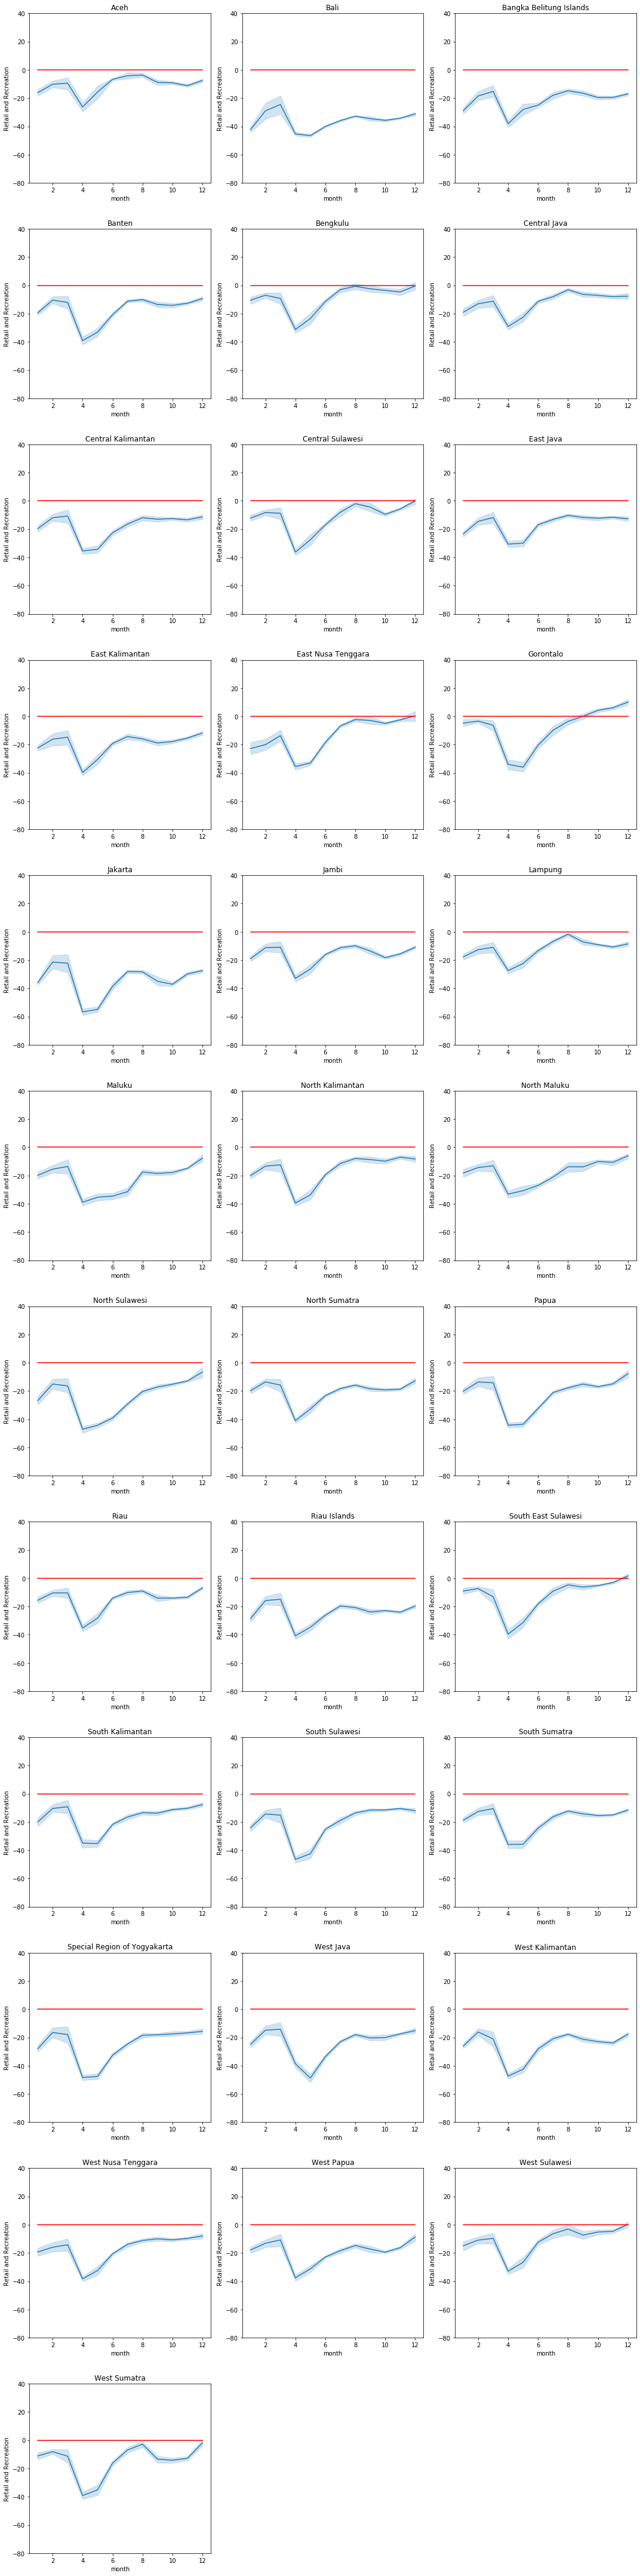

In [10]:
rows = 12
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(location):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Retail & Recreation'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Retail and Recreation')

plt.tight_layout(h_pad =3)

## Grocery & Pharmacy

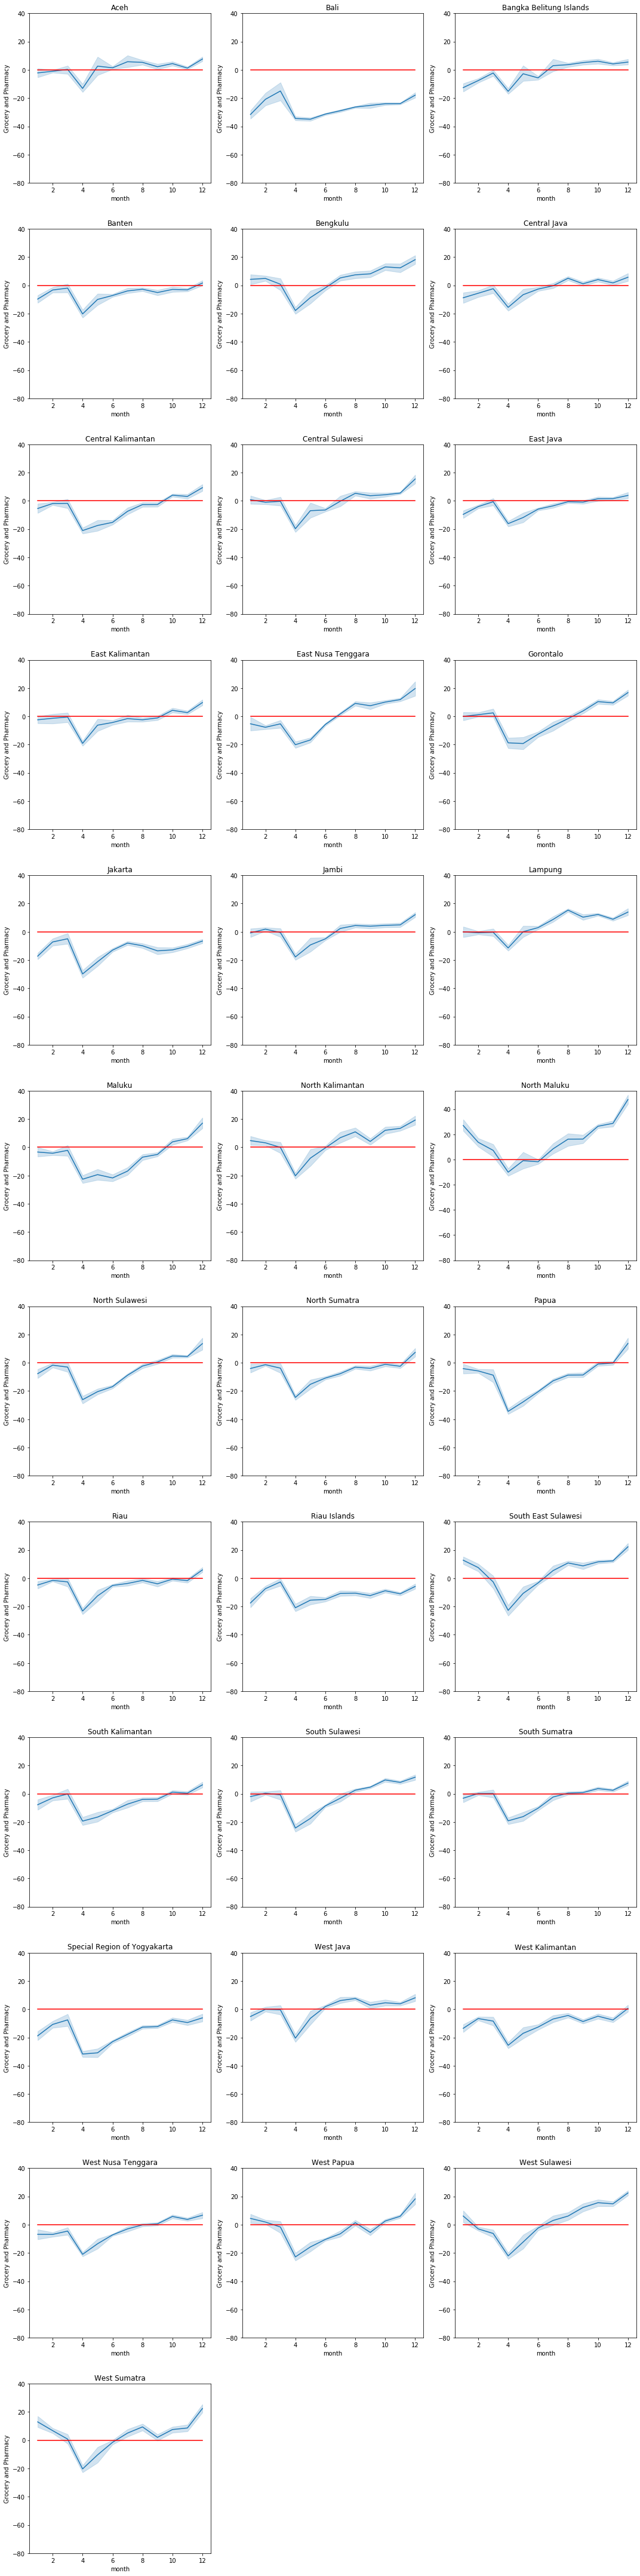

In [11]:
rows = 12
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(location):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Grocery & Pharmacy'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Grocery and Pharmacy')

plt.tight_layout(h_pad =3)

## Parks

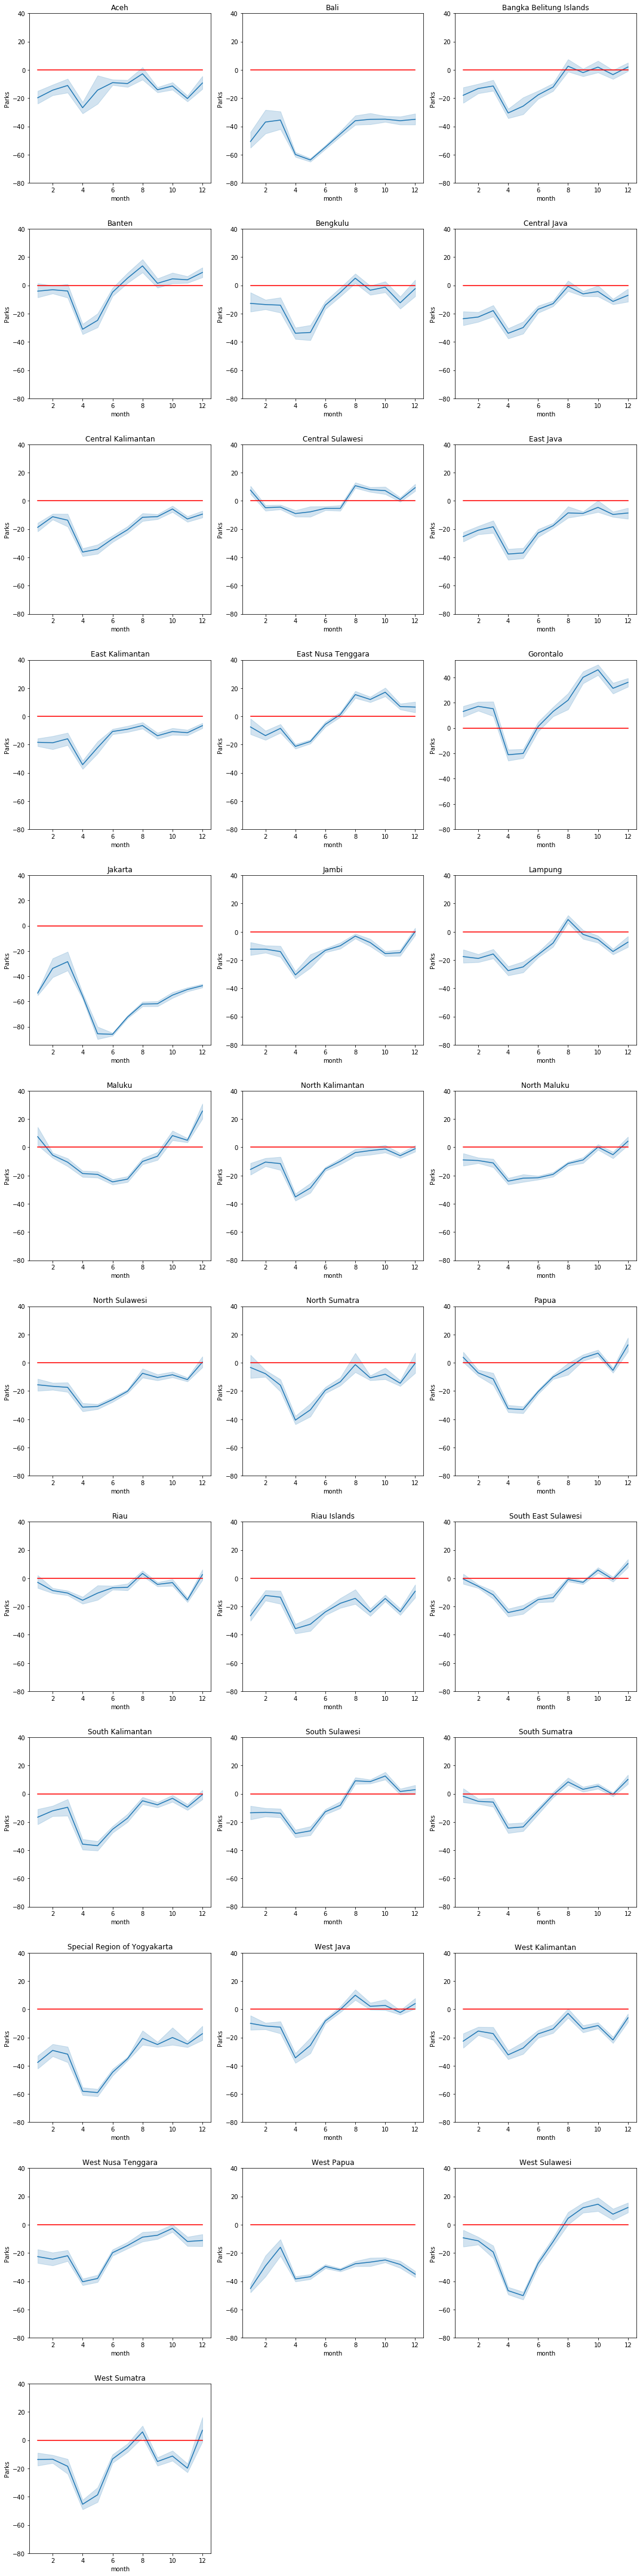

In [12]:
rows = 12
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(location):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Parks'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Parks')

plt.tight_layout(h_pad =3)

## Transit Stations

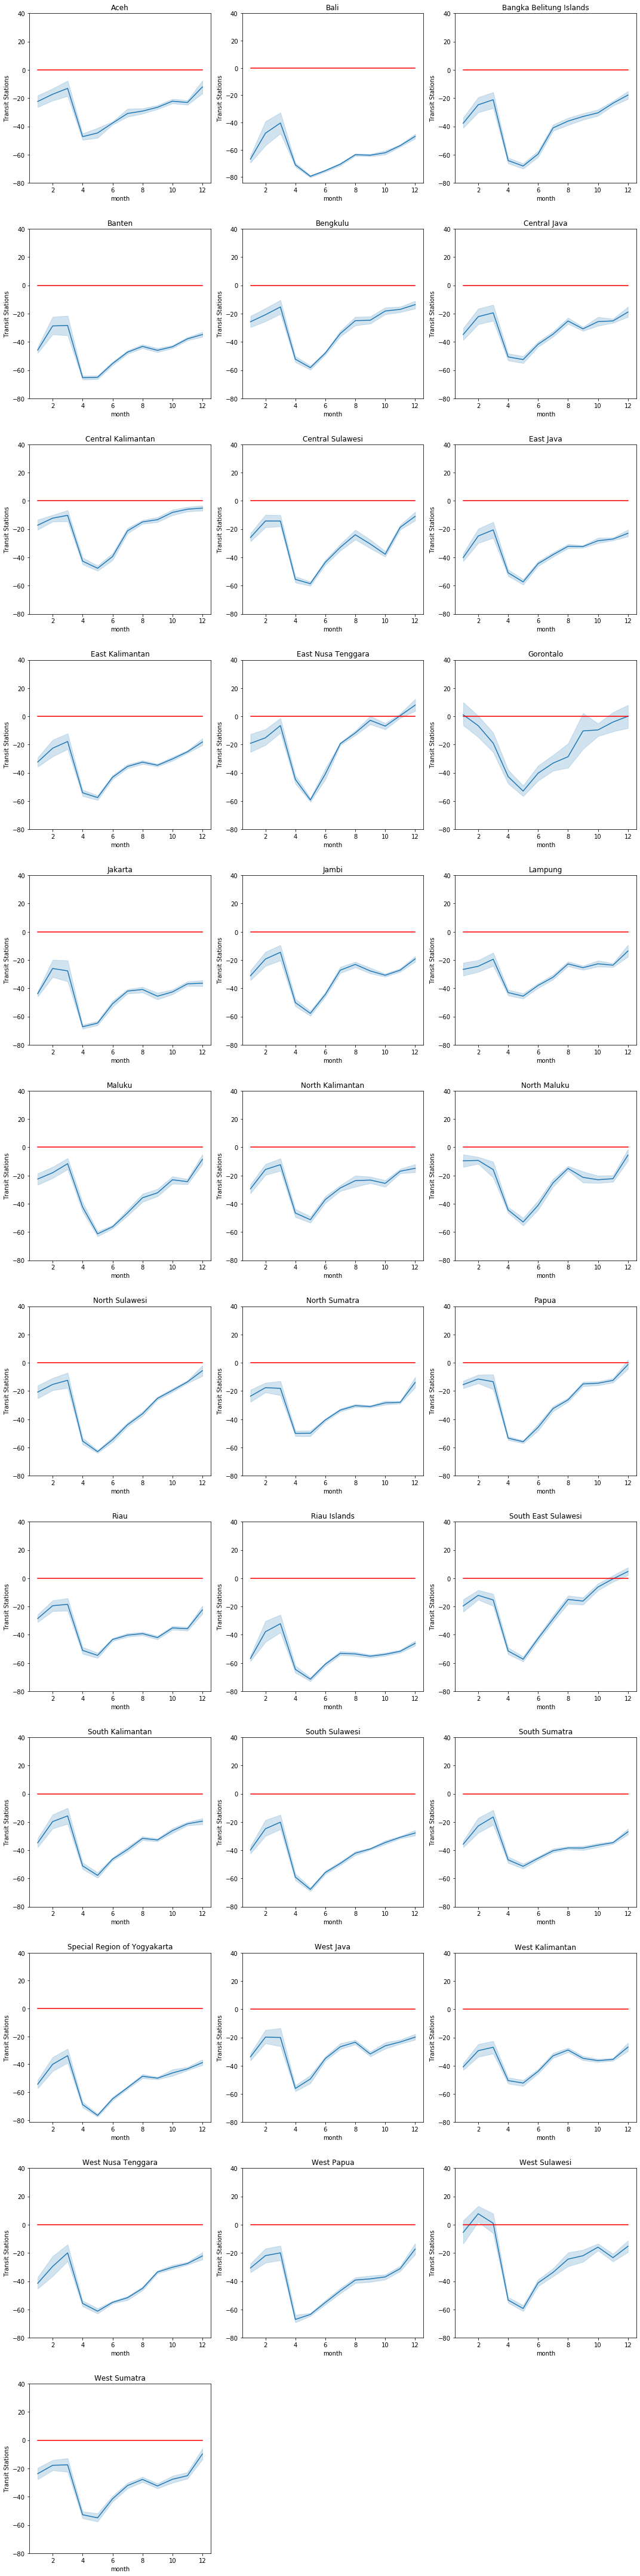

In [13]:
rows = 12
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(location):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Transit Stations'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Transit Stations')

plt.tight_layout(h_pad =3)

## Workplaces

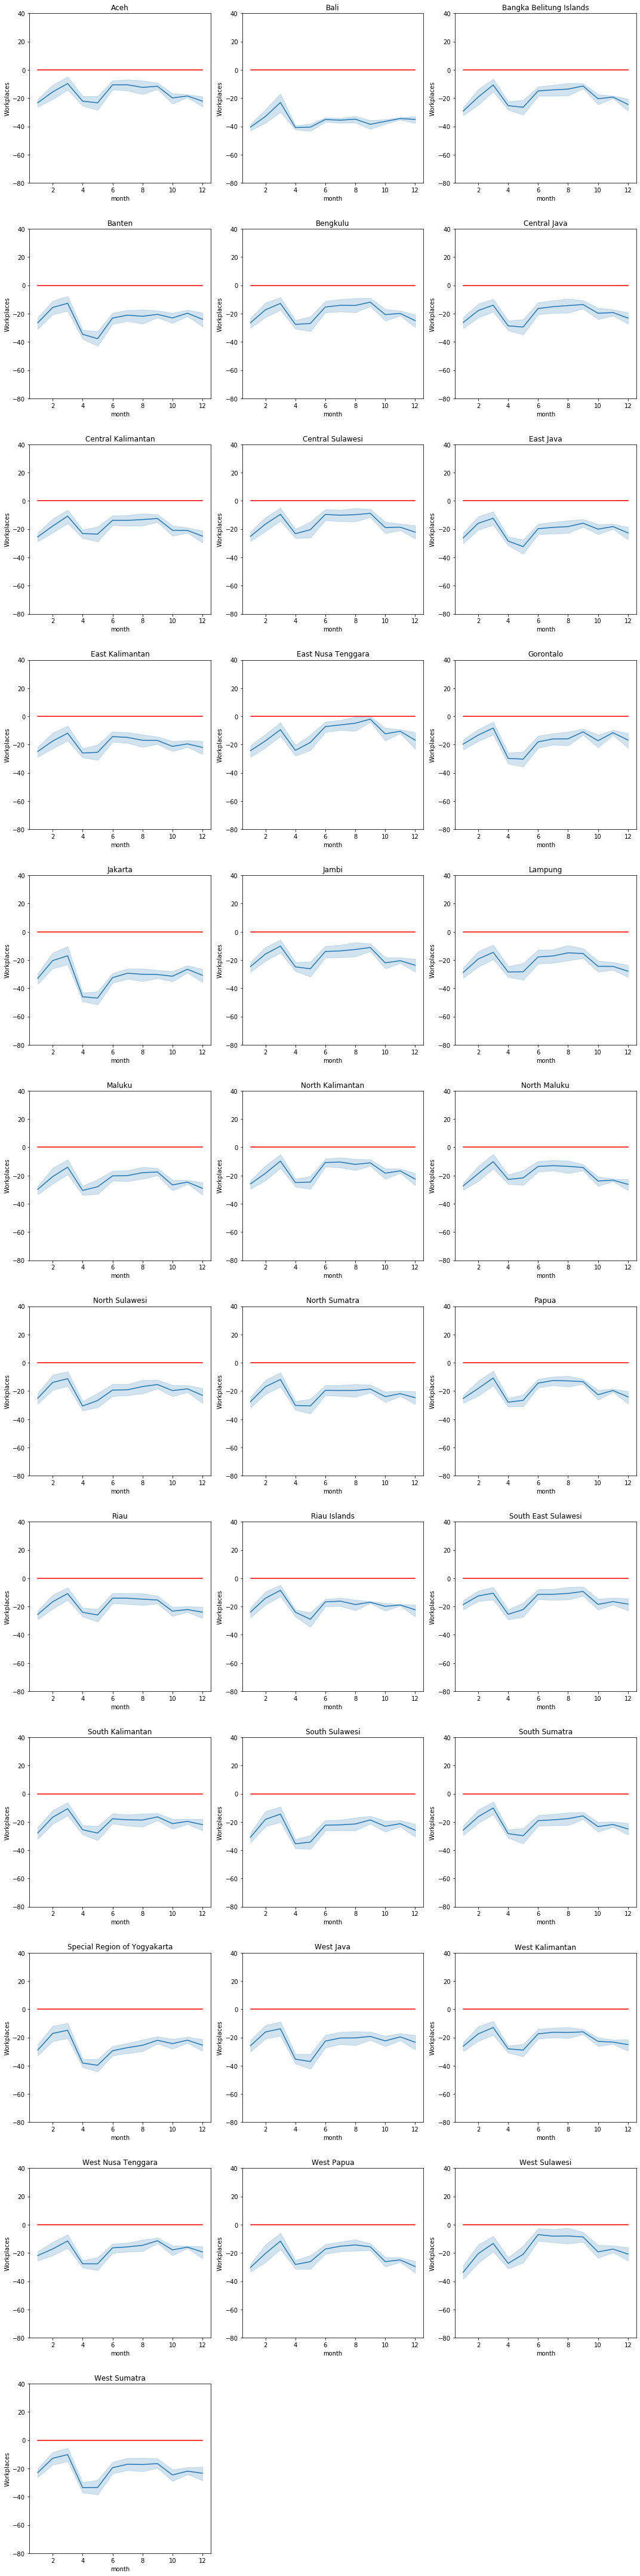

In [14]:
rows = 12
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(location):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Workplaces'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Workplaces')

plt.tight_layout(h_pad =3)

## Residential

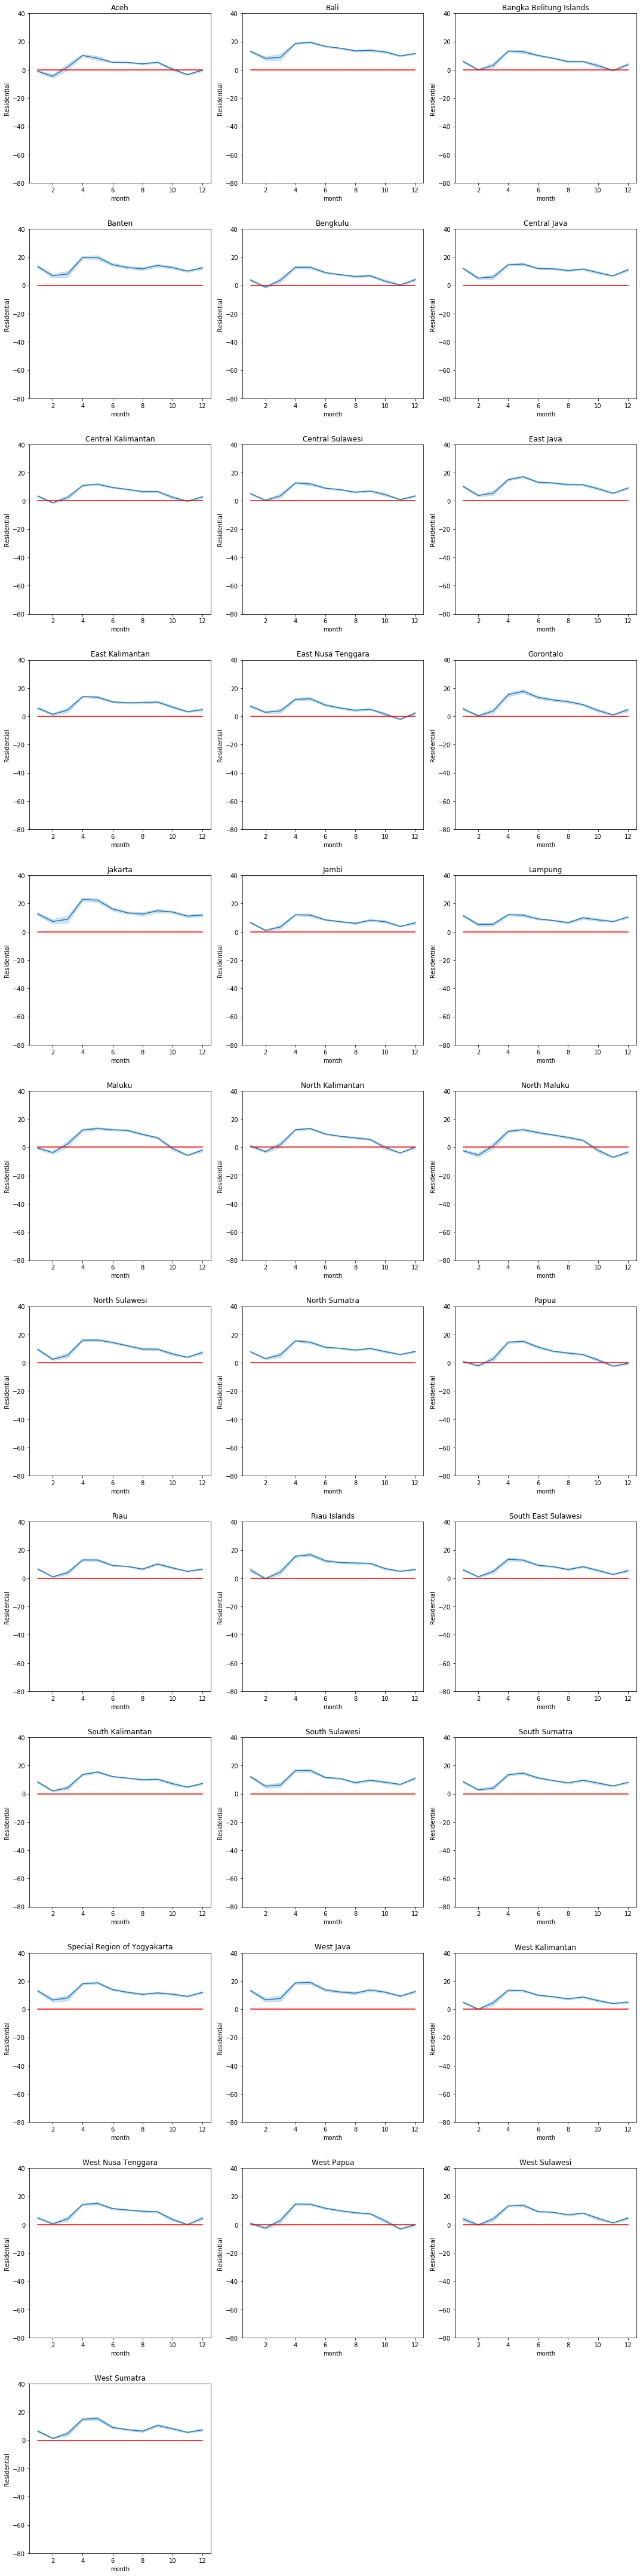

In [15]:
rows = 12
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(location):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Residential'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Residential')

plt.tight_layout(h_pad =3)

# Each Sector Visualization on Urban Area
The classification of urban area was based on ```https://luthfi-iqbal.medium.com/fixing-indonesian-urban-data-f824fab20f49``` which shows what region has metropolitan category

In [26]:
urban = ['North Sumatra', 'Riau', 'Riau Islands', 'South Sumatra', 'Lampung', 'Banten', 'Jakarta', 'West Java',
        'Central Java', 'Special Region of Yogyakarta', 'East Java', 'Bali', 'West Nusa Tenggara', 'South Sulawesi']

## Retail & Recreation

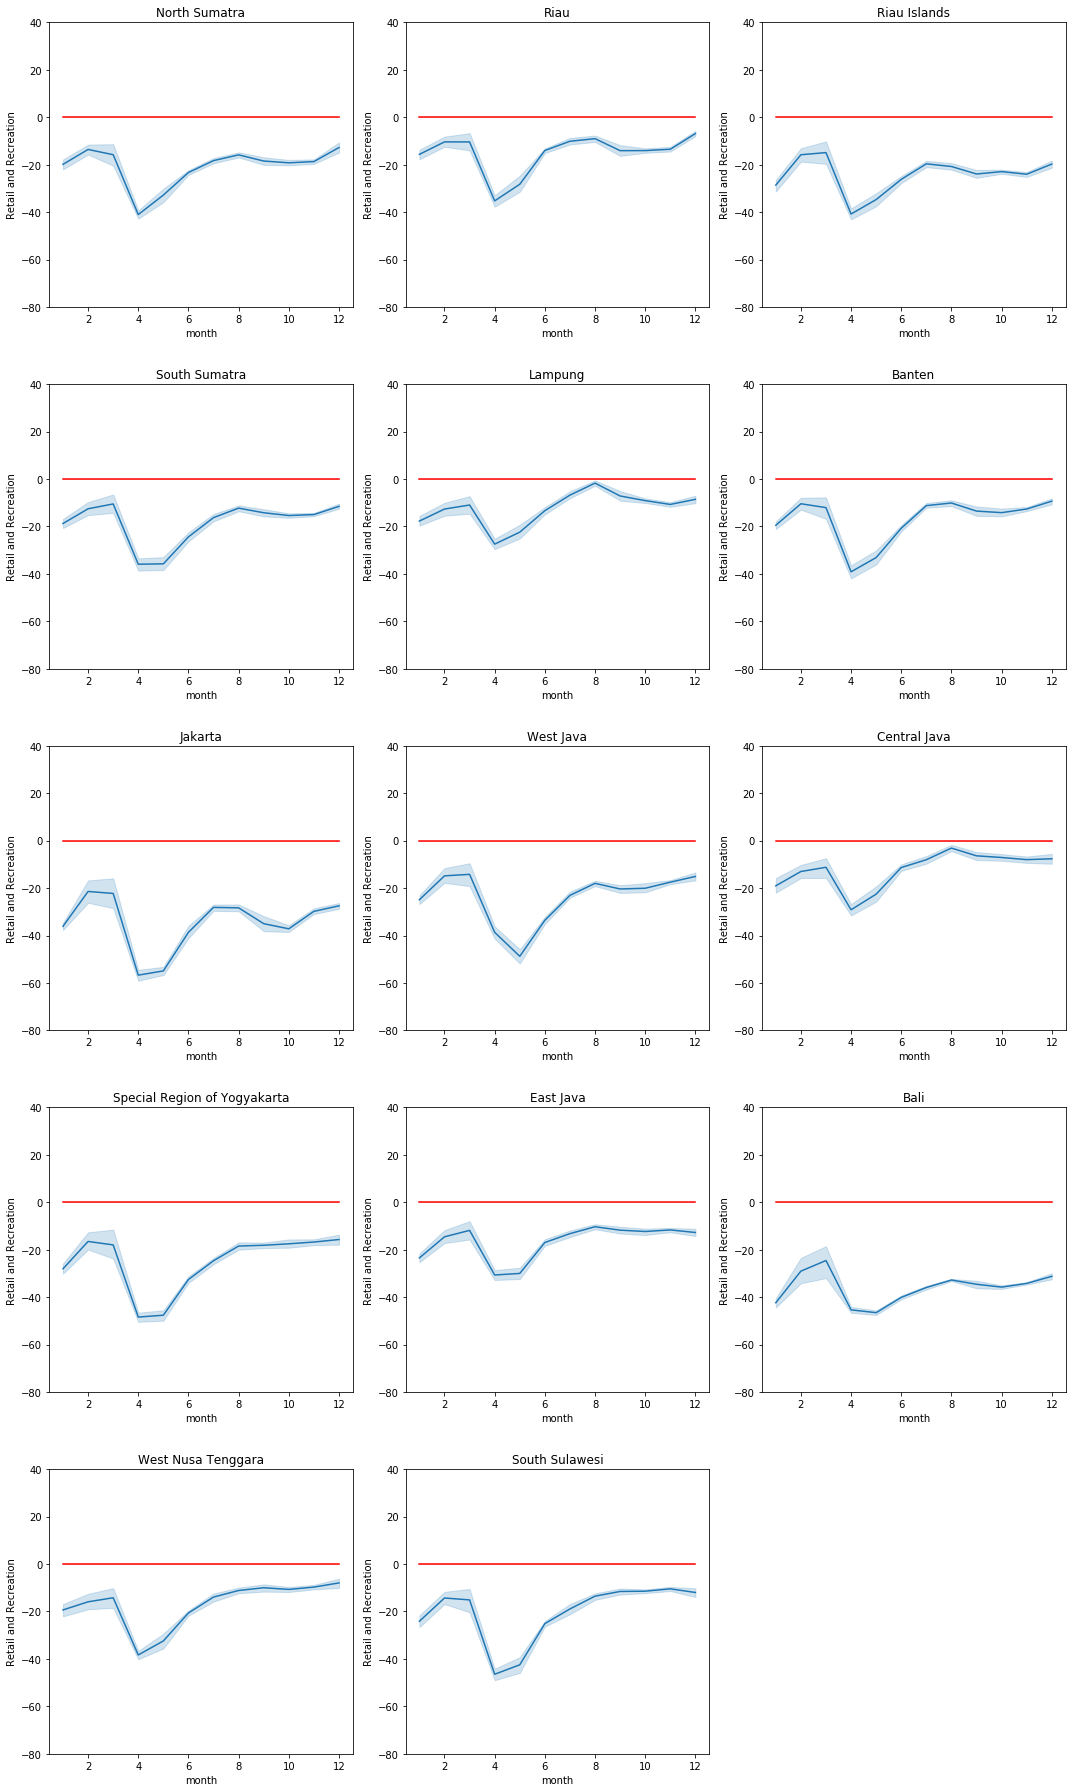

In [11]:
rows = 5
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(urban):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Retail & Recreation'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Retail and Recreation')

plt.tight_layout(h_pad =3)

No handles with labels found to put in legend.


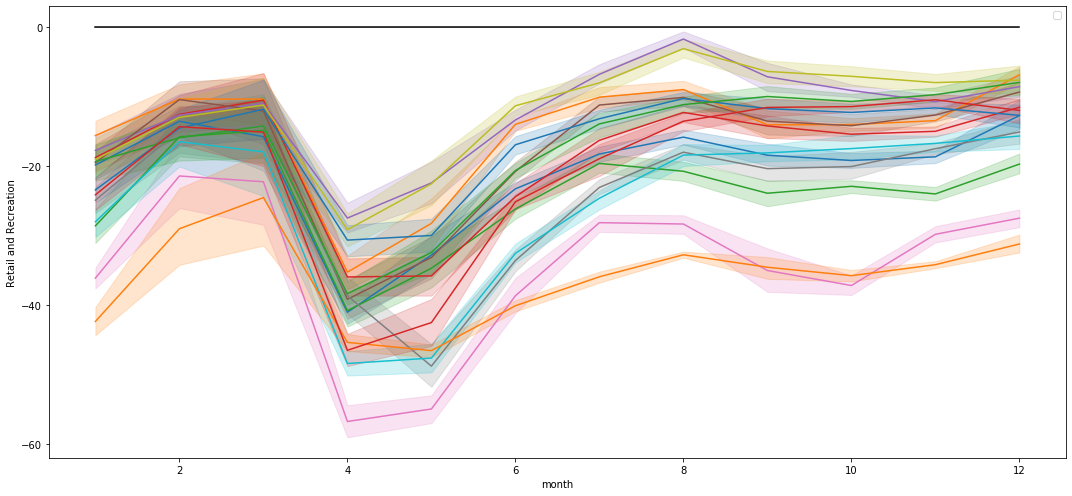

In [27]:
plt.figure(figsize=(15, 7))

for i, var in enumerate(urban):
#     plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Retail & Recreation'])
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
    
#     plt.title(var)
    plt.ylabel('Retail and Recreation')
_ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='k')
plt.legend()
plt.tight_layout(h_pad =3)

## Grocery & Pharmacy

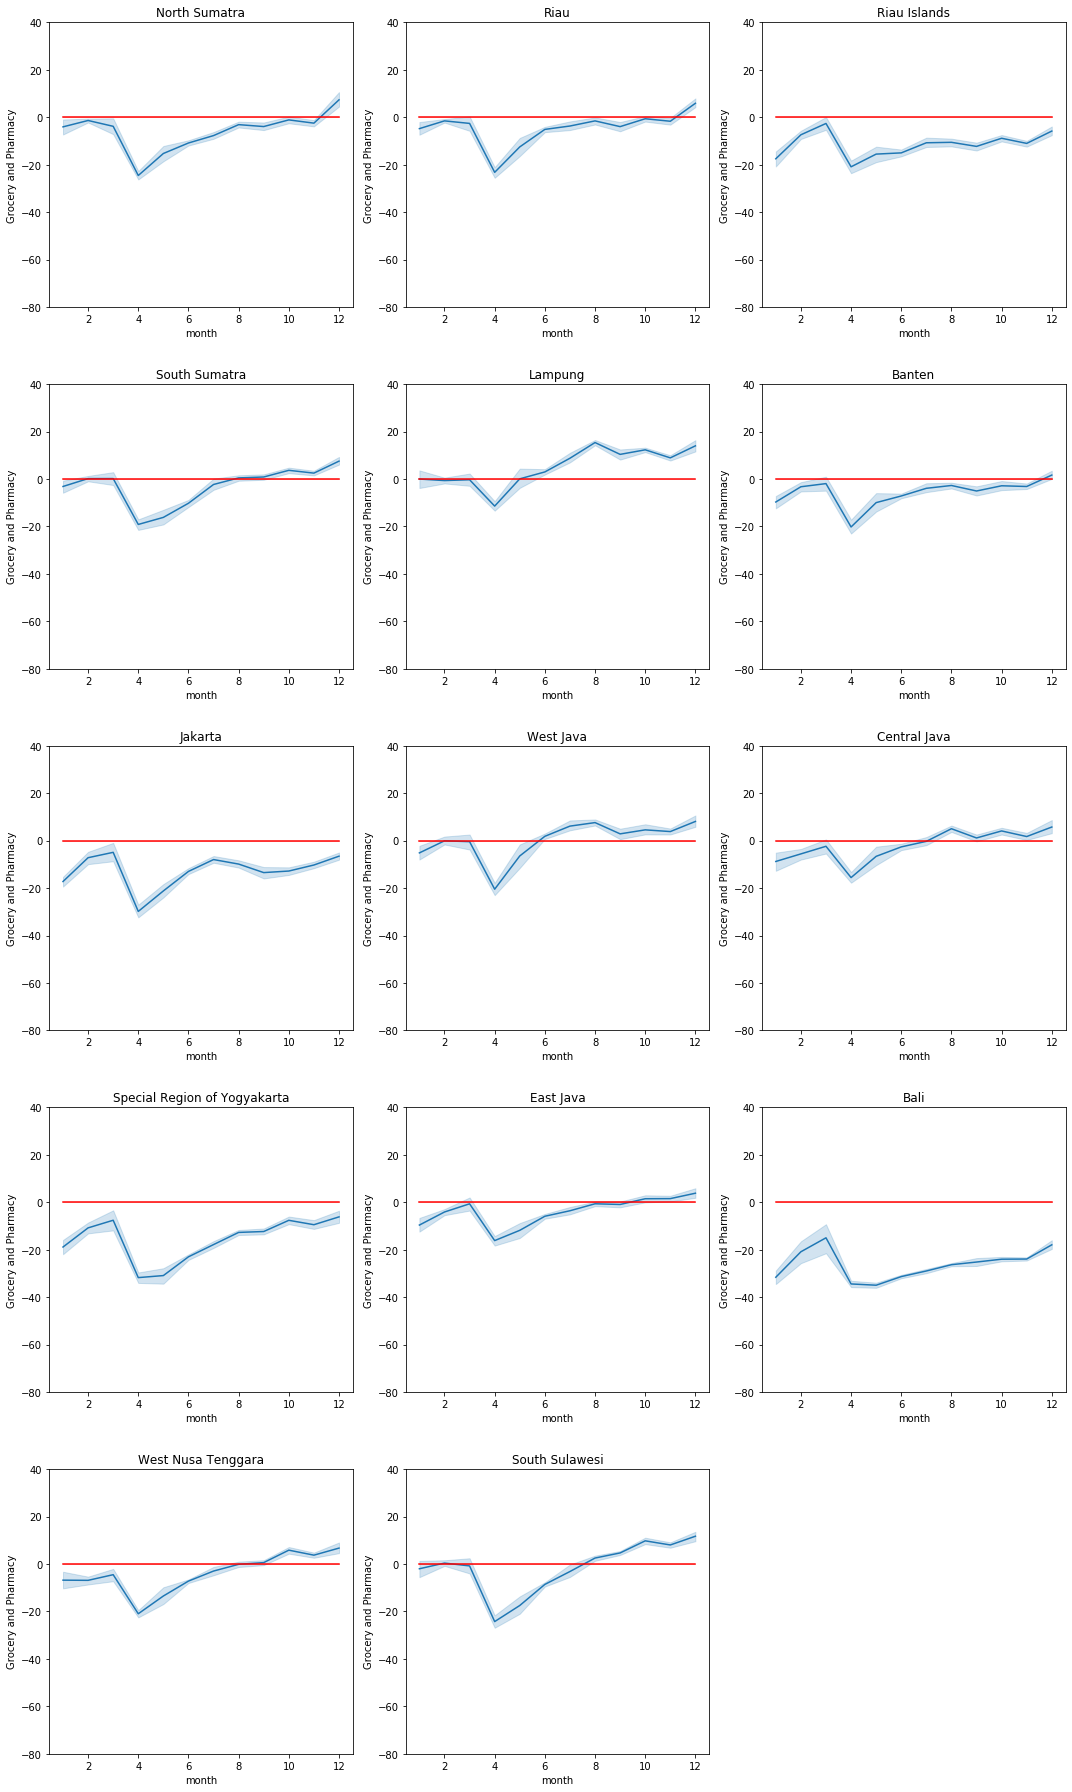

In [12]:
rows = 5
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(urban):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Grocery & Pharmacy'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Grocery and Pharmacy')

plt.tight_layout(h_pad =3)

## Parks

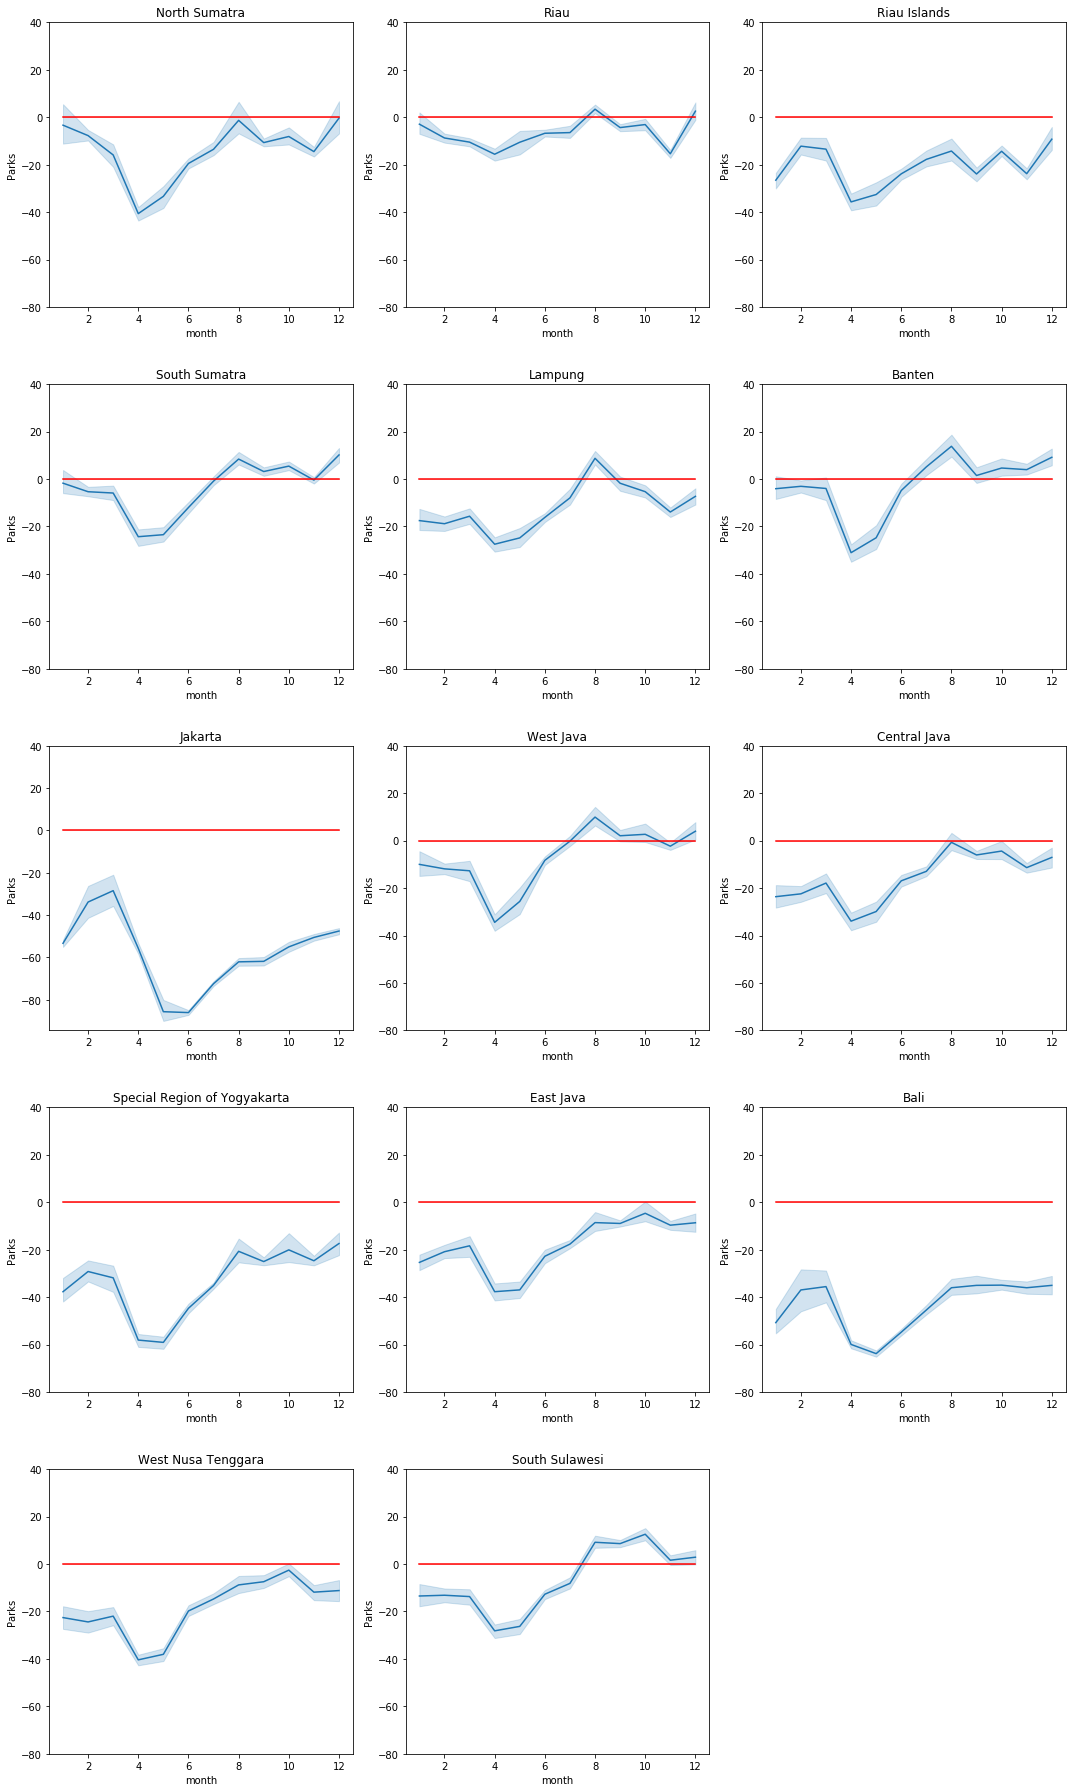

In [13]:
rows = 5
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(urban):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Parks'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Parks')

plt.tight_layout(h_pad =3)

## Transit Stations

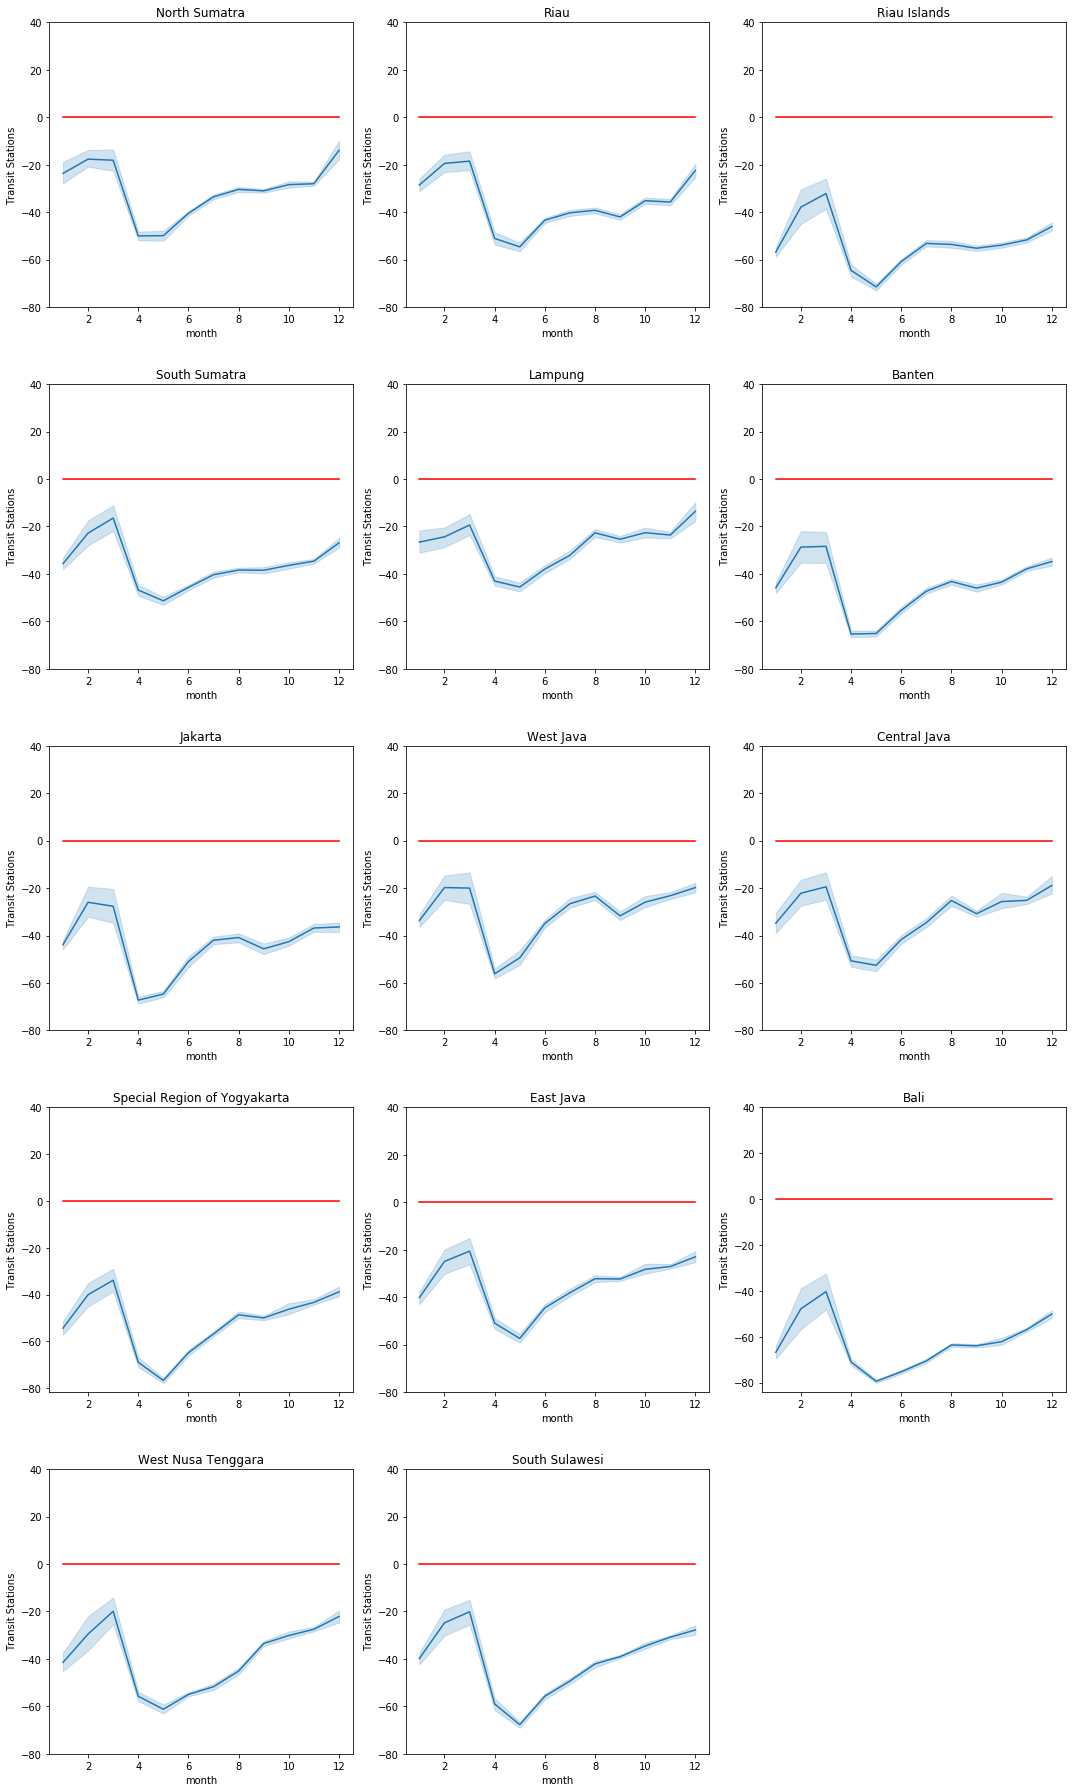

In [14]:
rows = 5
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(urban):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Transit Stations'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Transit Stations')

plt.tight_layout(h_pad =3)

## Workplaces

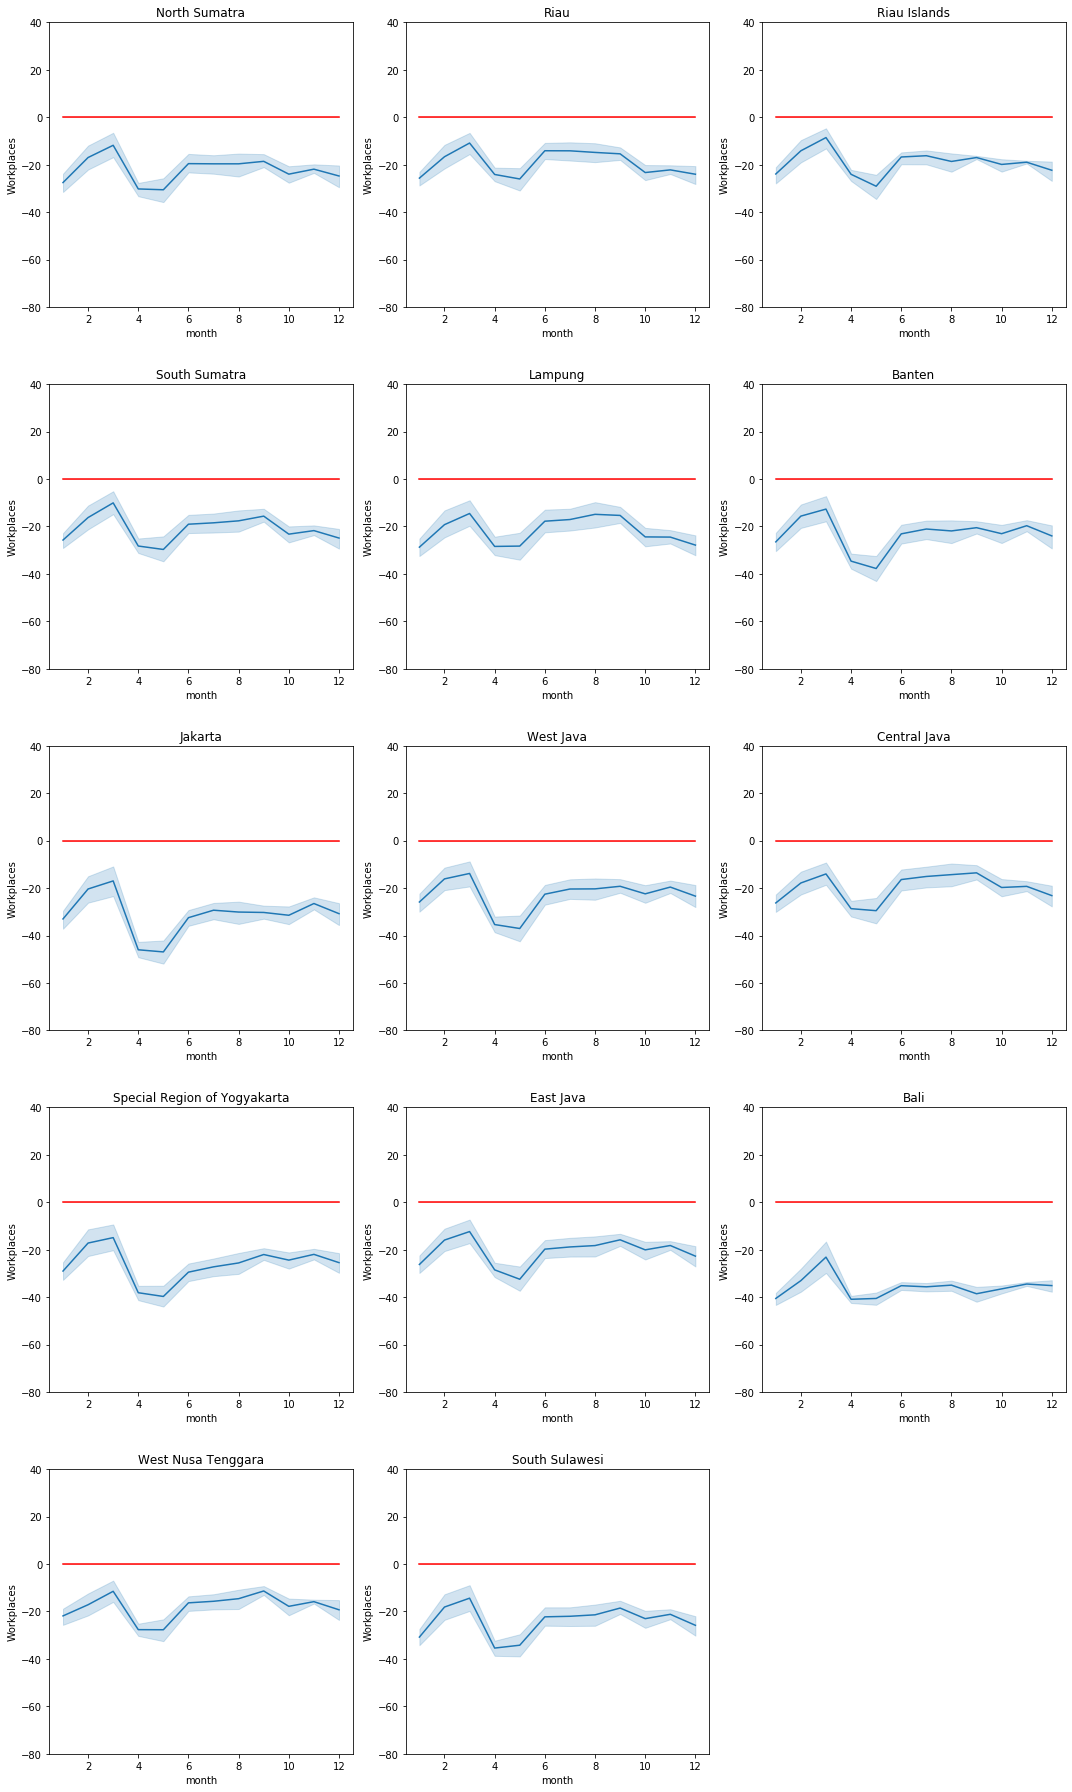

In [15]:
rows = 5
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(urban):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Workplaces'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Workplaces')

plt.tight_layout(h_pad =3)

## Residential

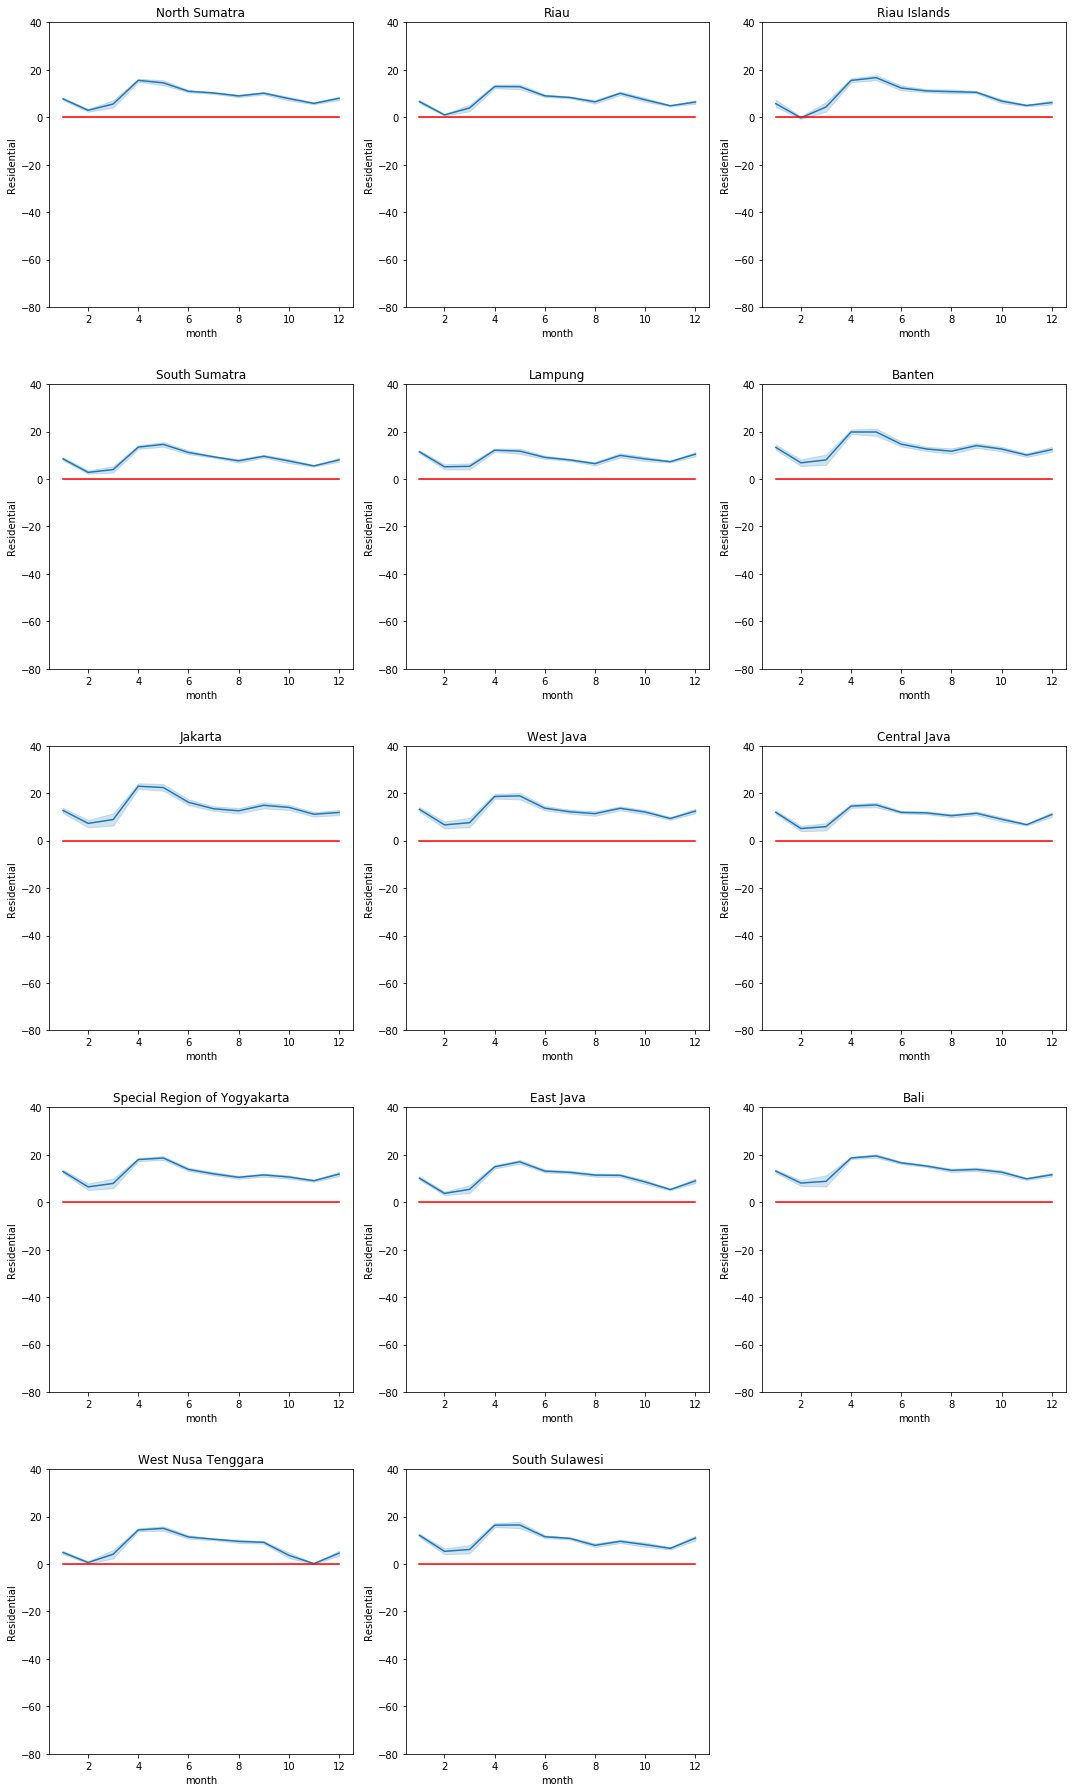

In [16]:
rows = 5
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(urban):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df['Residential'])
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='red')
#     my_yticks = _.get_yticks()
    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
#     plt.yticks([my_yticks[0], my_yticks[-1]], visible=True, rotation="vertical")
    
    plt.title(var)
    plt.ylabel('Residential')

plt.tight_layout(h_pad =3)

## Merge

C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


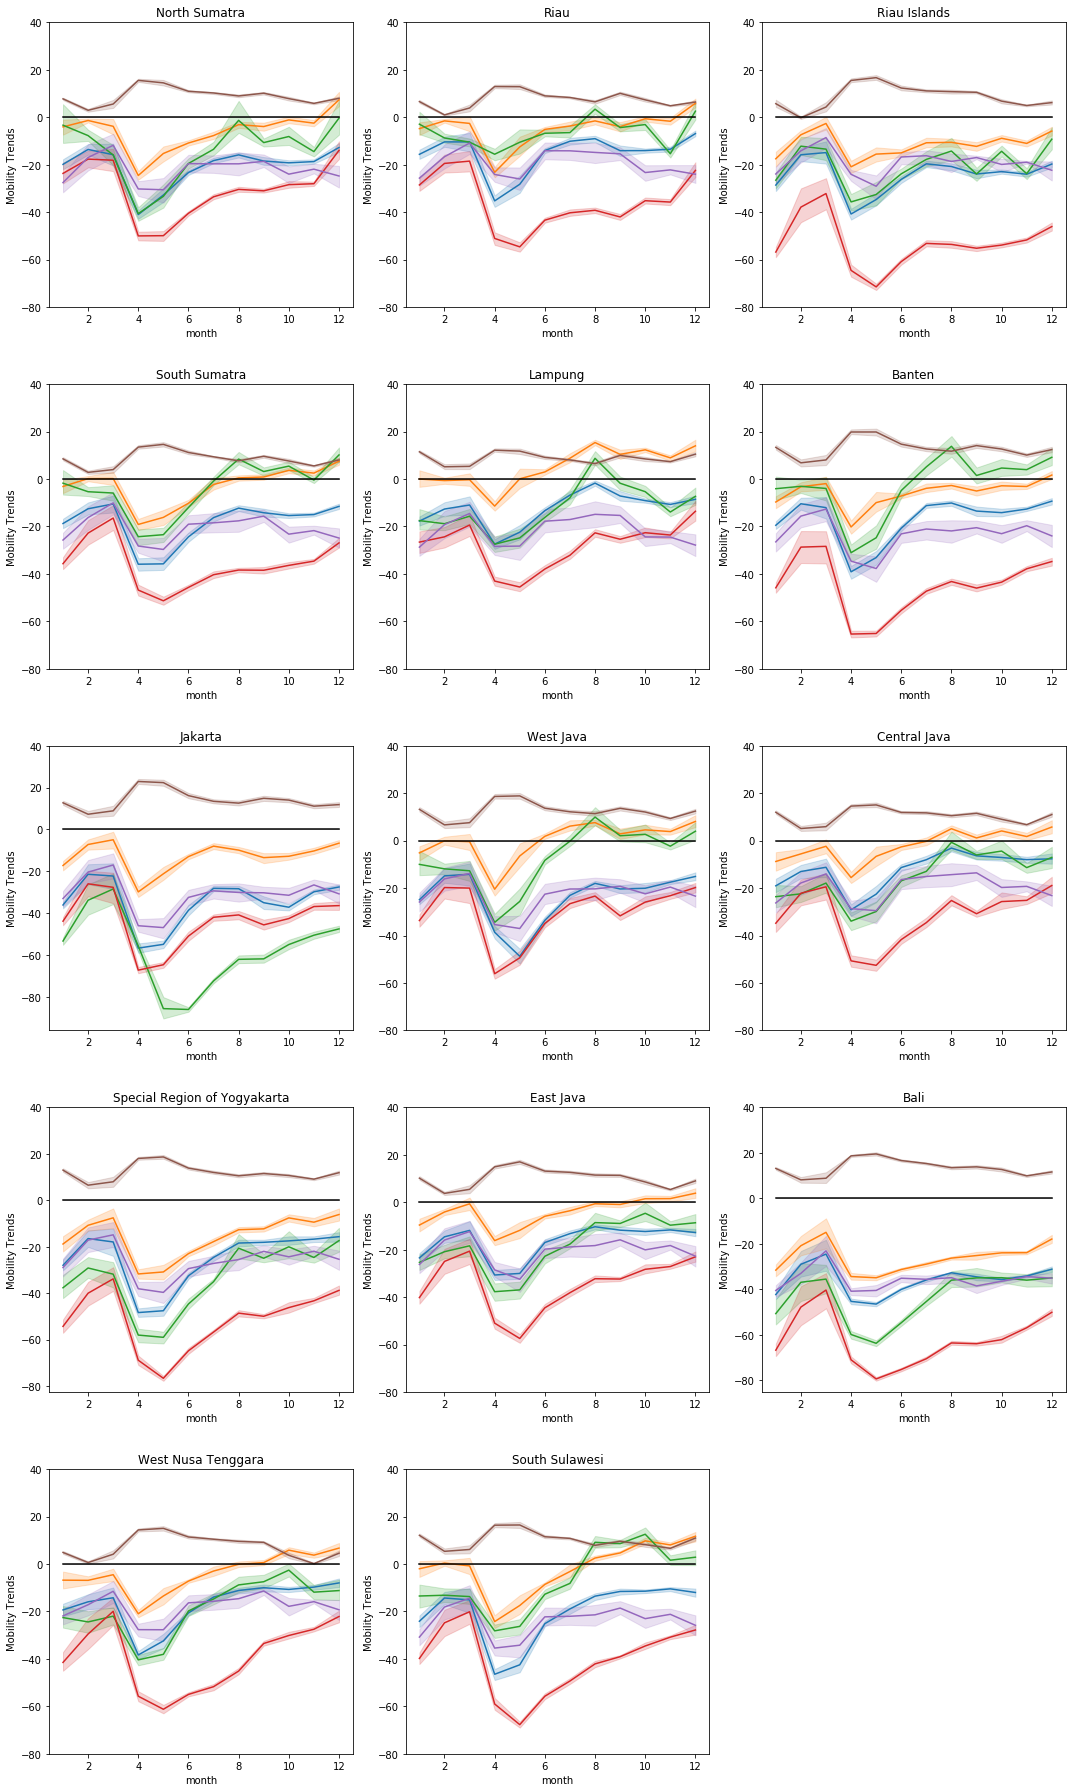

In [17]:
rows = 5
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(urban):
    for sect in variable:
        plt.subplot(rows, cols, i+1)
        _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=df[sect])
        
    _ = sns.lineplot(x= df[df.sub_region_1==var]['month'], y=0, color='k')

    my_yticks = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]
    plt.yticks(np.arange(min(my_yticks), max(my_yticks)+1, 20), visible=True, rotation="horizontal")
    plt.title(var)
#     plt.legend()
    plt.ylabel('Mobility Trends')
# plt.legend(loc=(0.83, 0))
    
plt.tight_layout(h_pad =3)

# Indonesia Overall

Text(0.5, 0.93, 'Indonesia')

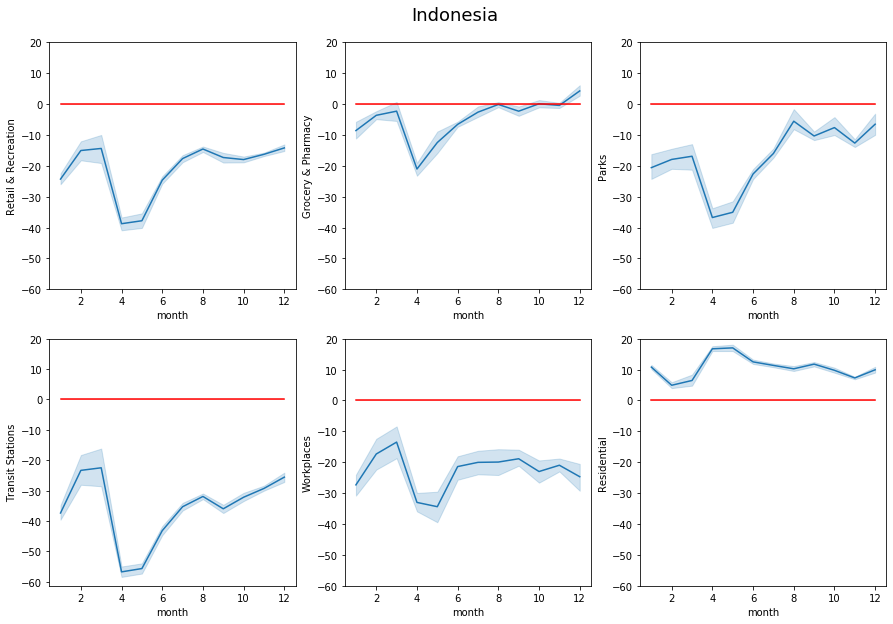

In [24]:
variable = ['Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']

rows = 2
cols = 3

plt.figure(figsize=(cols * 5, rows * 5))

for i, var in enumerate(variable):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1.isnull()]['month'], y=df[var])
    _ = sns.lineplot(x= df[df.sub_region_1.isnull()]['month'], y=0, color='red')
    my_yticks = [-60, -50, -40, -30, -20, -10, 0, 10, 20]
    plt.yticks(my_yticks, visible=True, rotation="horizontal")
    
    plt.ylabel(var)
plt.suptitle('Indonesia', fontsize=18, y=0.93)

C:\Users\kevin.wibowo\Miniconda3\envs\jcopml\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Indonesia')

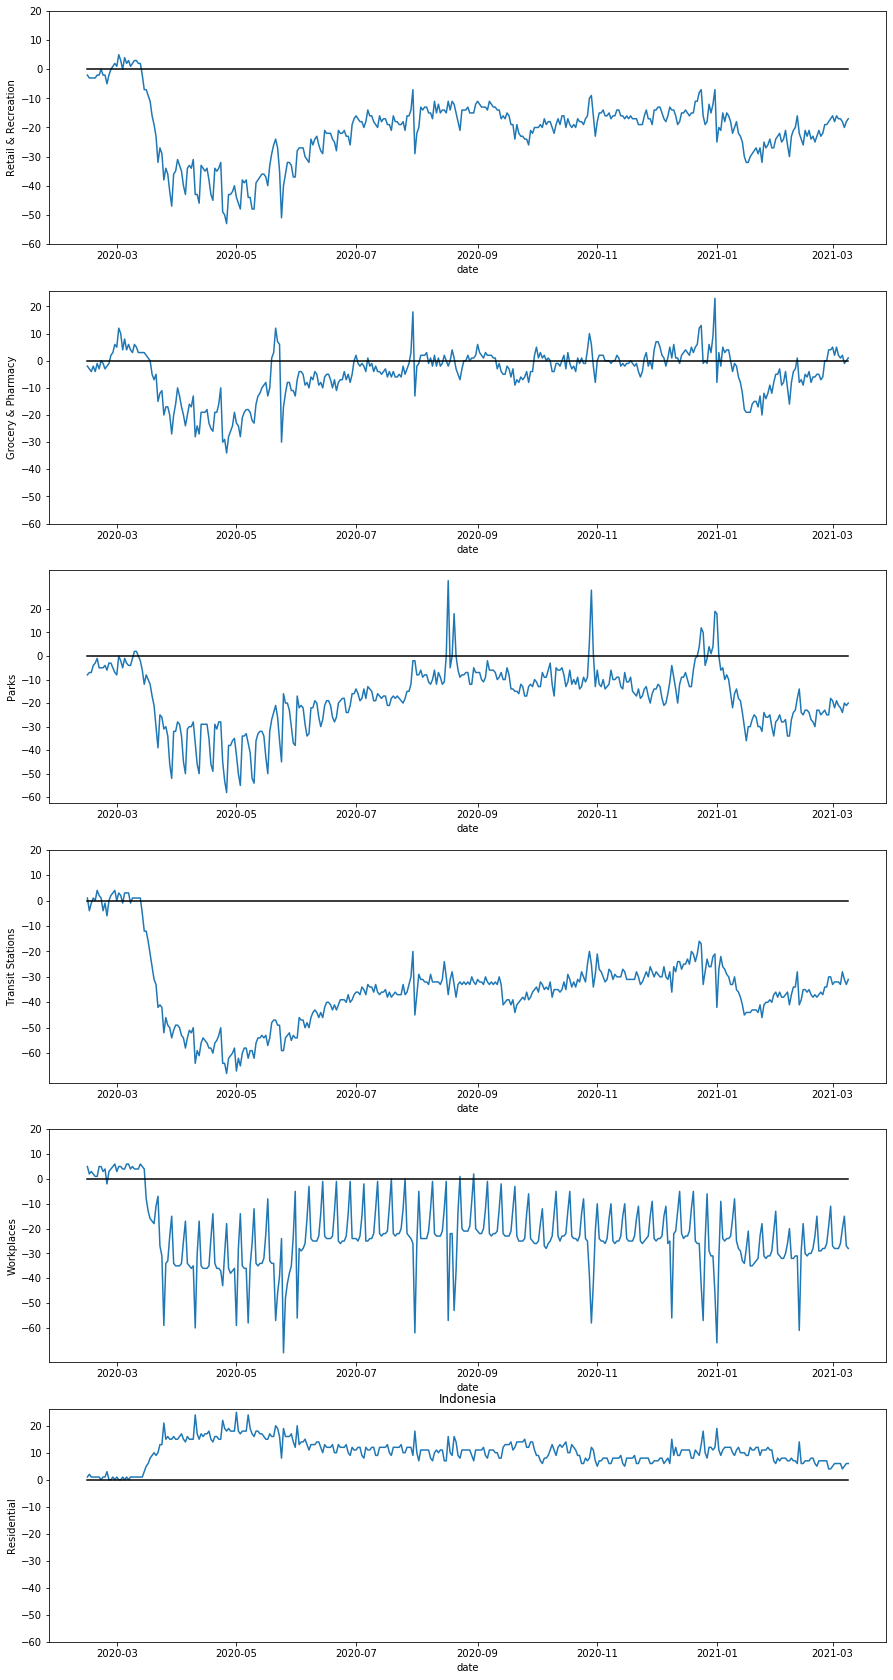

In [25]:
variable = ['Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']

rows = 6
cols = 1

plt.figure(figsize=(15, rows * 5))

for i, var in enumerate(variable):
    plt.subplot(rows, cols, i+1)
    _ = sns.lineplot(x= df[df.sub_region_1.isnull()]['date'], y=df[var])
    _ = sns.lineplot(x= df[df.sub_region_1.isnull()]['date'], y=0, color='black')
    my_yticks = [-60, -50, -40, -30, -20, -10, 0, 10, 20]
    plt.yticks(my_yticks, visible=True, rotation="horizontal")
  
    plt.ylabel(var)
plt.title('Indonesia')

# Important

In [44]:
special_date = ['2020-04-10', '2020-05-13', '2020-05-24', '2020-07-31', '2020-08-16', '2020-08-21', '2020-09-14', '2020-10-06',
                '2020-10-28', '2020-11-10', '2020-12-09', '2020-12-25', '2021-01-01', '2021-01-09', '2021-01-12', '2021-01-16',
                '2021-01-26', '2021-02-12']
special_event = ['First PSBB Jakarta', 'End of 1st PSBB', "Eid al-Fitr", 'Eid al-Adha', 'Indonesian Independence Day', 'Islamic New Year', 
                 'September PSBB', 'Omnibus Law Demonstration', "Prophet's Birthday", 'HRS Return', 'Local Election', "Christmas", 
                 'New Year', 'Sumedang Landslide & Sriwijaya Air Incident', 'Kalimantan Flood', 'Earthquake & Vulcanic Eruption',
                 'January PSBB', 'Lunar New Year']
# on about 15 march first unusual mobility trends happened

In [45]:
a = []
b = []
for i in range(len(special_date)):
    a.append(special_date[i])
    b.append(-70)
events = pd.concat([pd.DataFrame(a), pd.DataFrame(b)], axis=1)
events.columns=["Date", 'Marker']
events.head(3)

Date  Marker
0  2020-04-10     -70
1  2020-05-13     -70
2  2020-05-24     -70

C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


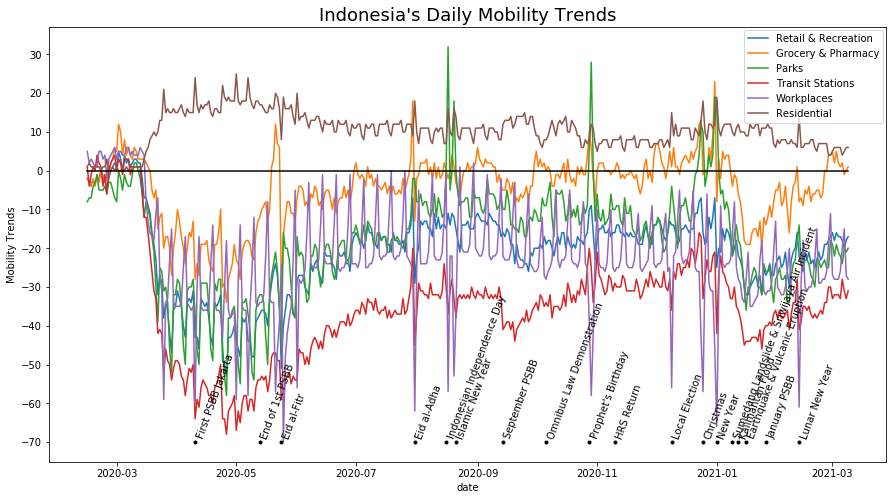

In [46]:
variable = ['Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']

plt.figure(figsize=(15, 8))

for i, var in enumerate(variable):
    _ = sns.lineplot(x= df[df.sub_region_1.isnull()]['date'], y=df[var], label=var)

for i in range(len(special_date)):
    _.text(events['Date'][i], events[events['Date'] == special_date[i]]['Marker']+1, special_event[i], ha='left', rotation=70)

# lolipop plot for events
_ = plt.stem(events['Date'], events['Marker'], linefmt= ' w', basefmt= ' ', markerfmt= 'k.')

_ = sns.lineplot(x= df[df.sub_region_1.isnull()]['date'], y=0, color='black')
my_yticks = [-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
plt.yticks(my_yticks, visible=True, rotation="horizontal")
plt.ylabel('Mobility Trends')

plt.title("Indonesia's Daily Mobility Trends", fontsize=18)

plt.legend(loc=(0.83, 0.78))

In [29]:
my_var = df[variable]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

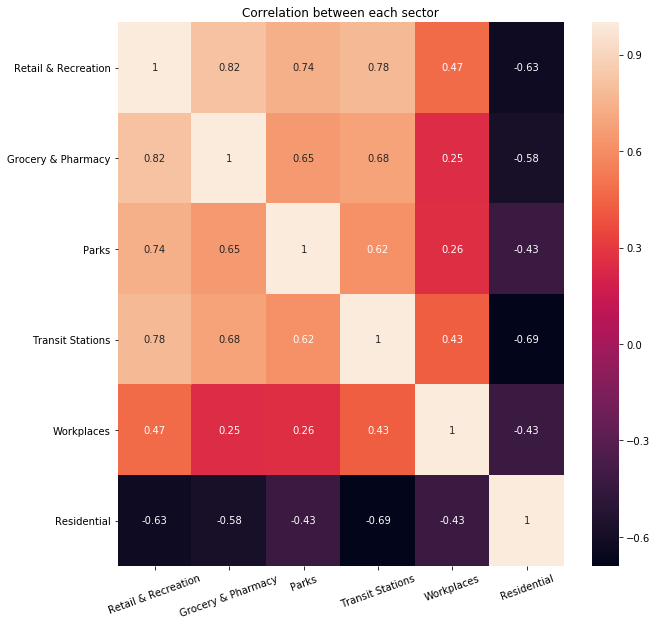

In [31]:
plt.figure(figsize=(10, 10))
_ = sns.heatmap(my_var.corr(), annot=True)
plt.title('Correlation between each sector')
plt.xticks(rotation=20)

In [31]:
df.place_id.nunique()

35

In [14]:
df[df.sub_region_1.isnull()].describe()

census_fips_code  Retail & Recreation  Grocery & Pharmacy       Parks  \
count               0.0           389.000000          389.000000  389.000000   
mean                NaN           -20.722365           -4.557841  -17.375321   
std                 NaN            10.802827            8.590025   13.070113   
min                 NaN           -53.000000          -34.000000  -58.000000   
25%                 NaN           -26.000000           -8.000000  -26.000000   
50%                 NaN           -19.000000           -3.000000  -16.000000   
75%                 NaN           -15.000000            1.000000   -9.000000   
max                 NaN             5.000000           23.000000   32.000000   

       Transit Stations  Workplaces  Residential         day       month  \
count        389.000000  389.000000   389.000000  389.000000  389.000000   
mean         -35.020566  -22.470437    10.447301   15.714653    6.269923   
std           14.363276   13.495791     4.599465    8.823488    3.492502   
min          -68.000000  -70.000000     0.000000    1.000000    1.000000   
25%          -42.000000  -29.000000     8.000000    8.000000    3.000000   
50%          -35.000000  -24.000000    11.000000   16.000000    6.000000   
75%          -30.000000  -15.000000    13.000000   23.000000    9.000000   
max            4.000000    6.000000    25.000000   31.000000   12.000000   

              year  
count   389.000000  
mean   2020.174807  
std       0.380291  
min    2020.000000  
25%    2020.000000  
50%    2020.000000  
75%    2020.000000  
max    2021.000000